<img src="./images/banner.png" width="800">

# Normalization and Standardization

Feature scaling is a crucial preprocessing step in many machine learning workflows. It involves transforming the features in a dataset to a common scale, without distorting differences in the ranges of values or losing information.


🔑 **Key Concept:** Feature scaling helps to standardize the range of independent variables or features of data.


Feature scaling is essential for several reasons:

1. **Improved Algorithm Performance:** Many machine learning algorithms perform better or converge faster when features are on a similar scale.

2. **Fair Feature Comparison:** Scaling ensures that all features contribute equally to the model, preventing features with larger magnitudes from dominating those with smaller magnitudes.

3. **Faster Convergence:** For gradient descent based algorithms, feature scaling can lead to faster convergence during the optimization process.


There are several methods of feature scaling, but two of the most common are:

1. **Normalization:** Also known as Min-Max scaling, this method scales all data points to a fixed range, typically between 0 and 1.

2. **Standardization:** This technique transforms the data to have a mean of 0 and a standard deviation of 1.


Feature scaling is particularly important in the following scenarios:

1. When features have different units of measurement (e.g., age in years vs. income in dollars).
2. When using distance-based algorithms like K-Nearest Neighbors or Support Vector Machines.
3. When dealing with regularization in linear models.


Not all algorithms require feature scaling. For example, tree-based algorithms are generally invariant to the scale of features.


Let's consider a feature $X$ with $n$ observations: $X = \{x_1, x_2, ..., x_n\}$


The general form of feature scaling can be represented as:

$X_{scaled} = \frac{X - A}{B}$

Where $A$ and $B$ are parameters that differ between normalization and standardization methods.


💡 **Pro Tip:** Always apply the same scaling to both your training and test datasets to maintain consistency in your model's performance.


In the following sections, we'll dive deeper into normalization and standardization, exploring their specific formulas, use cases, and implementation in Python.

**Table of contents**<a id='toc0_'></a>    
- [Understanding Normalization](#toc1_)    
  - [Characteristics of Normalization](#toc1_1_)    
  - [When to Use Normalization](#toc1_2_)    
  - [Implementing Normalization in Python](#toc1_3_)    
  - [Interpreting the Results](#toc1_4_)    
  - [Advantages and Disadvantages of Normalization](#toc1_5_)    
- [Exploring Standardization](#toc2_)    
  - [Characteristics of Standardization](#toc2_1_)    
  - [When to Use Standardization](#toc2_2_)    
  - [Implementing Standardization in Python](#toc2_3_)    
  - [Interpreting the Results](#toc2_4_)    
- [Comparing Normalization and Standardization](#toc3_)    
  - [When to Use Each Method](#toc3_1_)    
- [Other Data Scaling Methods](#toc4_)    
  - [Robust Scaling](#toc4_1_)    
  - [Max Abs Scaling](#toc4_2_)    
  - [Quantile Transformation](#toc4_3_)    
  - [Power Transformation](#toc4_4_)    
  - [When to Use These Methods](#toc4_5_)    
- [When to Apply Feature Scaling](#toc5_)    
- [Summary](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Understanding Normalization](#toc0_)

Normalization, also known as Min-Max scaling, is a feature scaling technique that transforms the features to a fixed range, typically between 0 and 1. This method preserves the shape of the original distribution and maintains zero values in sparse data.


Normalization scales each feature individually by subtracting the minimum value and dividing by the range (maximum - minimum). The formula for normalization is:

$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}$

Where:
- $X$ is the original feature vector
- $X_{min}$ is the minimum value of $X$
- $X_{max}$ is the maximum value of $X$


🔑 **Key Concept:** Normalization maps the lowest value to 0, the highest value to 1, and every other value to a decimal between 0 and 1.


### <a id='toc1_1_'></a>[Characteristics of Normalization](#toc0_)


Normalization has several distinct characteristics that set it apart from other scaling techniques. Understanding these properties is crucial for determining when and how to apply normalization effectively in your data preprocessing pipeline. Let's explore the key characteristics of this scaling method:

1. **Bound Range:** All normalized values fall between 0 and 1. This consistent range makes it easier to compare and interpret features, regardless of their original scales.

2. **Doesn't preserve zero values**: If a value in the original data is zero, in min-max scaling it will not be zero in the normalized data. Some algorithms are able to handle this, but it is not a property that is guaranteed by min-max scaling.

3. **Doesn't Center the Data:** Unlike some other scaling techniques, normalization doesn't center the data around zero. The mean of normalized data depends on the original distribution of the feature.

4. **Sensitive to Outliers:** Extreme values in the original data can have a significant impact on the normalized results. Outliers can compress the normalized range for the majority of the data points, potentially obscuring important patterns.


By understanding these characteristics, you can make informed decisions about when to use normalization and how it might affect your subsequent analysis or modeling steps.


### <a id='toc1_2_'></a>[When to Use Normalization](#toc0_)


Normalization is particularly useful in the following scenarios:

1. When you need values to have exact bounds (e.g., for neural network inputs).
2. In algorithms that are sensitive to the scale of features but not their distribution (e.g., K-Nearest Neighbors).
3. When working with image pixel intensities or audio signal amplitudes.


❗️ **Important Note:** Normalization can be sensitive to outliers. If your data contains extreme values, consider using robust scaling methods or handling outliers before normalization.


### <a id='toc1_3_'></a>[Implementing Normalization in Python](#toc0_)


Let's implement normalization using both NumPy and scikit-learn, and visualize the results:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# Normalize using NumPy
normalized_np = (data - np.min(data)) / (np.max(data) - np.min(data))

# Normalize using scikit-learn
scaler = MinMaxScaler()
normalized_sklearn = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create DataFrames for easier plotting
df = pd.DataFrame({'Original': data, 'Normalized (NumPy)': normalized_np, 'Normalized (sklearn)': normalized_sklearn})
df

,Original,Normalized (NumPy),Normalized (sklearn)
0,54.967142,0.526922,0.526922
1,48.617357,0.437412,0.437412
2,56.476885,0.548204,0.548204
3,65.230299,0.671595,0.671595
4,47.658466,0.423895,0.423895
...,...,...,...
995,47.188997,0.417278,0.417278
996,67.976865,0.710312,0.710312
997,56.408429,0.547239,0.547239
998,44.288210,0.376387,0.376387


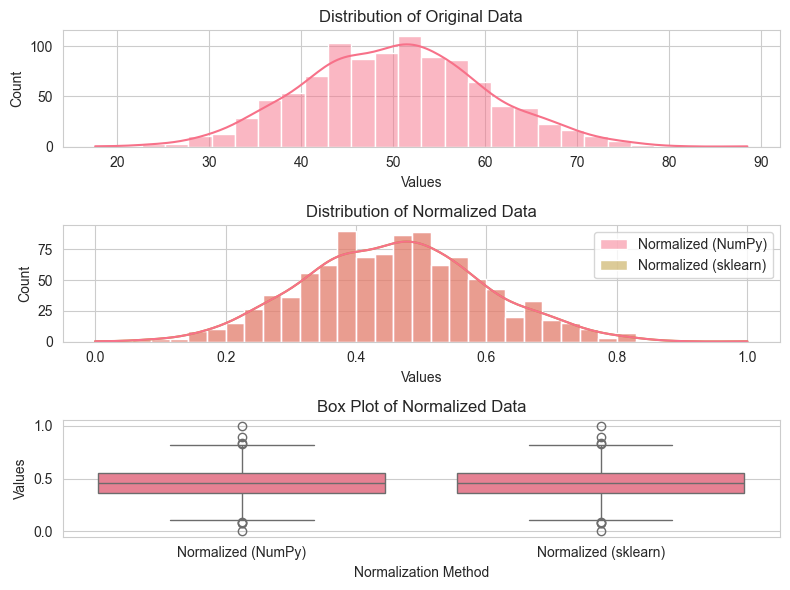

In [2]:
# Visualize the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))

# Original data distribution
sns.histplot(data=df, x='Original', kde=True, ax=ax1)
ax1.set_title('Distribution of Original Data')
ax1.set_xlabel('Values')

# Normalized data distributions
sns.histplot(data=df.drop(columns=['Original']), kde=True, ax=ax2)
ax2.set_title('Distribution of Normalized Data')
ax2.set_xlabel('Values')

# Box plots
sns.boxplot(data=pd.melt(df.drop(columns=['Original'])), x='variable', y='value', ax=ax3)
ax3.set_title('Box Plot of Normalized Data')
ax3.set_xlabel('Normalization Method')
ax3.set_ylabel('Values')

plt.tight_layout()
plt.show()

This code generates a sample dataset, normalizes it using both NumPy and scikit-learn, and visualizes the original and normalized distributions.


### <a id='toc1_4_'></a>[Interpreting the Results](#toc0_)


The visualization shows how normalization affects the distribution of the data:

1. The shape of the distribution remains the same, but the scale changes.
2. The normalized data is compressed into the range [0, 1].
3. Both NumPy and scikit-learn implementations produce identical results.


💡 **Pro Tip:** When using scikit-learn's `MinMaxScaler`, you can specify a custom range using the `feature_range` parameter, e.g., `MinMaxScaler(feature_range=(-1, 1))` for scaling between -1 and 1.


### <a id='toc1_5_'></a>[Advantages and Disadvantages of Normalization](#toc0_)


Advantages:
1. Preserves the shape of the original distribution.
2. Useful for algorithms that require data on a fixed scale.


Disadvantages:
1. Doesn't handle outliers well; they can compress the normalized range.
2. Doesn't center the data around zero, which may be required for some algorithms.
3. Doesn't preserve zero values in sparse data.

🤔 **Why This Matters:** Understanding when and how to apply normalization can significantly impact your model's performance. It's particularly crucial in neural networks and distance-based algorithms where the scale of input features can affect the learning process or distance calculations.


In the next section, we'll explore standardization, another popular scaling technique, and compare it with normalization to understand their differences and use cases.

## <a id='toc2_'></a>[Exploring Standardization](#toc0_)


Standardization, also known as Z-score normalization, is another crucial feature scaling technique that transforms the data to have a mean of 0 and a standard deviation of 1. This method is particularly useful when dealing with features that follow a Gaussian distribution.


Standardization scales each feature by subtracting the mean and dividing by the standard deviation. The formula for standardization is:

$X_{standardized} = \frac{X - \mu}{\sigma}$

Where:
- $X$ is the original feature vector
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature


🔑 **Key Concept:** Standardization centers the data around zero and scales it to unit variance, which can be particularly useful for many machine learning algorithms.


### <a id='toc2_1_'></a>[Characteristics of Standardization](#toc0_)


Standardization has several key characteristics that distinguish it from other scaling methods:

1. **Centering:** The standardized data has a mean of 0, which centers it around the origin.
2. **Unit Variance:** The standardized data has a standard deviation of 1, making the scale of all features comparable.
3. **Unbounded Range:** Unlike normalization, standardized values are not bounded to a specific range.
4. **Outlier Sensitivity:** Standardization is less affected by outliers compared to min-max scaling, but extreme outliers can still have an impact.


### <a id='toc2_2_'></a>[When to Use Standardization](#toc0_)


Standardization is particularly useful in the following scenarios:

1. When working with algorithms that assume the data is normally distributed (e.g., linear regression, logistic regression).
2. In Principal Component Analysis (PCA) or clustering algorithms where the scale of features matters.
3. When features have significantly different scales and you want to compare them on equal footing.


💡 **Pro Tip:** Standardization is particularly useful when your features have significantly different scales or when you're using algorithms that assume the data is centered around zero with unit variance (e.g., many neural network architectures).


### <a id='toc2_3_'></a>[Implementing Standardization in Python](#toc0_)


Let's implement standardization using both NumPy and scikit-learn, and visualize the results:


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# Standardize using NumPy
standardized_np = (data - np.mean(data)) / np.std(data)

# Standardize using scikit-learn
scaler = StandardScaler()
standardized_sklearn = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create DataFrame for easier plotting
df = pd.DataFrame({'Original': data, 'Standardized (NumPy)': standardized_np, 'Standardized (sklearn)': standardized_sklearn})

In [4]:
df

,Original,Standardized (NumPy),Standardized (sklearn)
0,54.967142,0.487759,0.487759
1,48.617357,-0.161022,-0.161022
2,56.476885,0.642015,0.642015
3,65.230299,1.536382,1.536382
4,47.658466,-0.258995,-0.258995
...,...,...,...
995,47.188997,-0.306963,-0.306963
996,67.976865,1.817009,1.817009
997,56.408429,0.635020,0.635020
998,44.288210,-0.603347,-0.603347


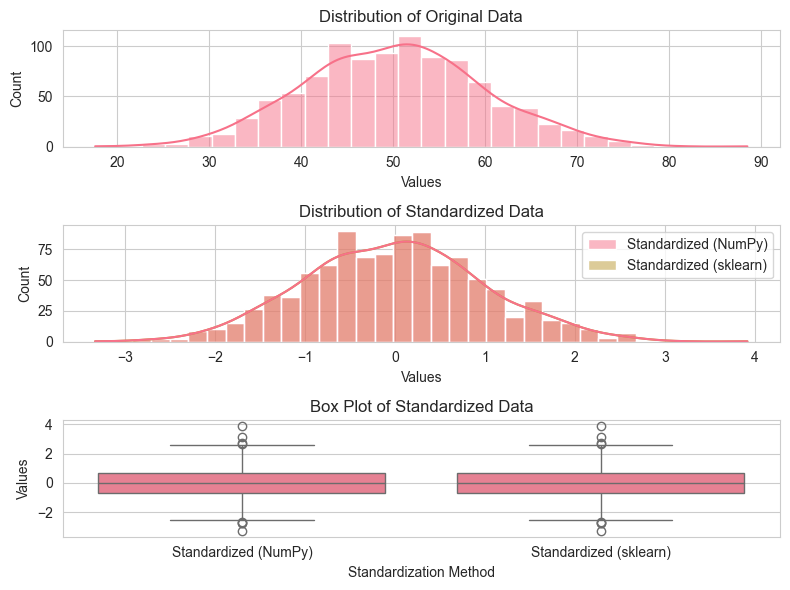

In [5]:
# Visualize the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))

# Original data distribution
sns.histplot(data=df, x='Original', kde=True, ax=ax1)
ax1.set_title('Distribution of Original Data')
ax1.set_xlabel('Values')

# Standardized data distributions
sns.histplot(data=df.drop(columns=['Original']), kde=True, ax=ax2)
ax2.set_title('Distribution of Standardized Data')
ax2.set_xlabel('Values')

# Box plots
sns.boxplot(data=pd.melt(df.drop(columns=['Original'])), x='variable', y='value', ax=ax3)
ax3.set_title('Box Plot of Standardized Data')
ax3.set_xlabel('Standardization Method')
ax3.set_ylabel('Values')

plt.tight_layout()
plt.show()

In [6]:
# Display summary statistics
df.describe()

,Original,Standardized (NumPy),Standardized (sklearn)
count,1000.000000,1.000000e+03,1.000000e+03
mean,50.193321,-1.056932e-16,-1.056932e-16
std,9.792159,1.000500e+00,1.000500e+00
min,17.587327,-3.331472e+00,-3.331472e+00
25%,43.524097,-6.814187e-01,-6.814187e-01
50%,50.253006,6.098290e-03,6.098290e-03
75%,56.479439,6.422755e-01,6.422755e-01
max,88.527315,3.916723e+00,3.916723e+00


### <a id='toc2_4_'></a>[Interpreting the Results](#toc0_)


The visualizations provide insights into how standardization affects the data:

1. **Distribution Plot:**
   - The original data's distribution shape is preserved in the standardized versions.
   - The standardized data is centered around 0, with most values falling between -3 and 3.
   - Both NumPy and scikit-learn implementations produce identical results.

2. **Box Plot:**
   - The standardized data's box plot shows the median at or very close to 0.
   - The interquartile range (box) typically spans from about -1 to 1.
   - Outliers, if present, are more easily identifiable in the standardized data.

3. **Summary Statistics:**
   - The mean of the standardized data should be very close to 0.
   - The standard deviation should be very close to 1.
   - The minimum and maximum values indicate the spread of the data in terms of standard deviations from the mean.


❗️ **Important Note:** While standardization is generally robust, it may not be suitable for data with a non-Gaussian distribution or when the absolute scale of features is important for your analysis.


By understanding the properties and effects of standardization, you can make informed decisions about when to apply this scaling technique in your data preprocessing pipeline.

## <a id='toc3_'></a>[Comparing Normalization and Standardization](#toc0_)

Understanding the differences between normalization and standardization is crucial for choosing the appropriate scaling method for your data. Both techniques have their strengths and are suited for different scenarios. Let's compare these methods across various aspects to gain a comprehensive understanding.


Normalization and standardization differ fundamentally in how they transform the data:

- **Normalization** scales features to a fixed range, typically [0, 1].
- **Standardization** centers the data around 0 with a standard deviation of 1.


Let's explore the main differences between these scaling techniques:

1. **Output Range:**
   - Normalization: Fixed range, typically [0, 1]
   - Standardization: Unbounded, but typically most values fall within [-3, 3]

2. **Central Tendency:**
   - Normalization: Does not center the data
   - Standardization: Centers the data around 0

3. **Outlier Sensitivity:**
   - Normalization: More sensitive to outliers
   - Standardization: Less affected by outliers

4. **Preserving Zero Values:**
   - Normalization: Can preserve zero values in sparse data in certain cases, but not guaranteed.
   - Standardization: Does not preserve zero values


### <a id='toc3_1_'></a>[When to Use Each Method](#toc0_)


🔑 **Key Concept:** The choice between normalization and standardization often depends on the specific requirements of your machine learning algorithm and the nature of your data.


Use Normalization when:
- You need bounded values, like in neural network outputs
- Working with algorithms that don't assume any distribution of the data

Use Standardization when:
- Working with algorithms assuming normally distributed data (e.g., linear regression)
- Dealing with features with outliers
- Using PCA or other algorithms sensitive to the variance of features


💡 **Pro Tip:** Some algorithms, like Support Vector Machines or K-Nearest Neighbors, can work well with either method. In such cases, it's often beneficial to try both and compare the results.


In practice, you should compare the performance of both methods on your specific dataset and use the one that best fits the requirements of your machine learning algorithm and the nature of your data.

1. **Data Distribution:** If your data is not normally distributed, standardization might not be the best choice.

2. **Algorithm Requirements:** Some algorithms perform better with specific scaling methods. Always consult the algorithm's documentation.

3. **Domain Knowledge:** Sometimes, the choice depends on the specific meaning of your features in the context of your problem.


❗️ **Important Note:** Always apply the same scaling method to both your training and test datasets to maintain consistency in your model's performance.


By understanding these comparisons and considerations, you can make an informed decision about which scaling method to use in your data preprocessing pipeline, ultimately improving the performance and reliability of your machine learning models.

## <a id='toc4_'></a>[Other Data Scaling Methods](#toc0_)

While normalization and standardization are the most commonly used scaling techniques, several other methods can be valuable in specific scenarios. Let's explore some of these well-known and practical scaling methods:


### <a id='toc4_1_'></a>[Robust Scaling](#toc0_)


Robust scaling is particularly useful when your data contains outliers. It uses statistics that are robust to outliers.


🔑 **Key Concept:** Robust scaling uses the median and interquartile range instead of the mean and standard deviation.


Text(0.5, 0, 'Values')

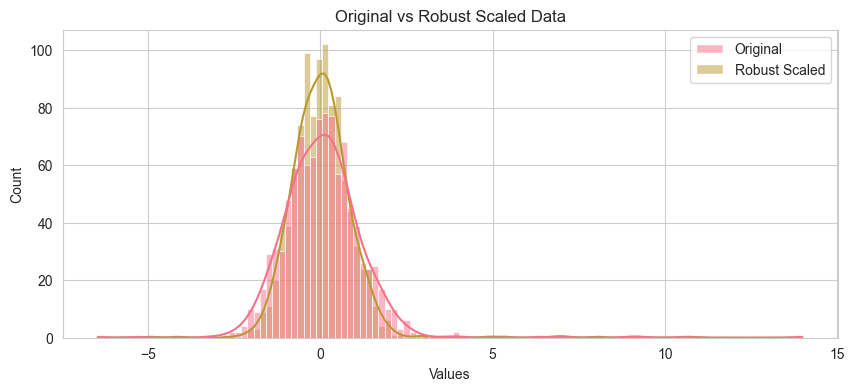

In [7]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data with outliers
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 1000), np.random.normal(0, 1, 10) * 10])

# Apply robust scaling
robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(data.reshape(-1, 1))

# Visualize
plt.figure(figsize=(10, 4))
sns.histplot(data=pd.DataFrame({'Original': data, 'Robust Scaled': data_robust.flatten()}), kde=True)
plt.title('Original vs Robust Scaled Data')
plt.xlabel('Values')

### <a id='toc4_2_'></a>[Max Abs Scaling](#toc0_)


Max Abs scaling scales each feature by its maximum absolute value. This scaling is particularly useful for sparse data.


💡 **Pro Tip:** Max Abs scaling preserves zero entries in sparse data and does not shift/center the data.


Text(0.5, 0, 'Values')

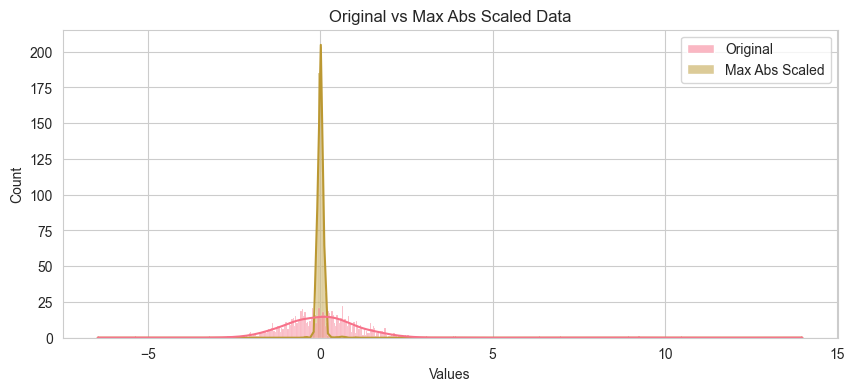

In [8]:
from sklearn.preprocessing import MaxAbsScaler

# Apply Max Abs scaling
max_abs_scaler = MaxAbsScaler()
data_max_abs = max_abs_scaler.fit_transform(data.reshape(-1, 1))

# Visualize
plt.figure(figsize=(10, 4))
sns.histplot(data=pd.DataFrame({'Original': data, 'Max Abs Scaled': data_max_abs.flatten()}), kde=True)
plt.title('Original vs Max Abs Scaled Data')
plt.xlabel('Values')

### <a id='toc4_3_'></a>[Quantile Transformation](#toc0_)


Quantile transformation transforms the features to follow a uniform or normal distribution. This is particularly useful for features with non-Gaussian distributions.


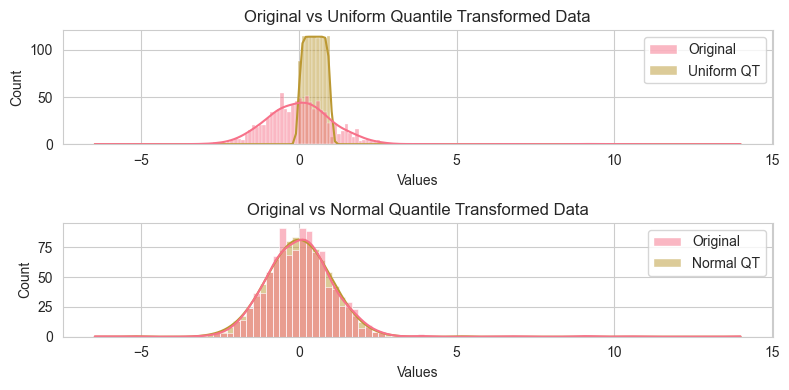

In [9]:
from sklearn.preprocessing import QuantileTransformer

# Apply Quantile transformation (uniform distribution)
qt_uniform = QuantileTransformer(output_distribution='uniform')
data_qt_uniform = qt_uniform.fit_transform(data.reshape(-1, 1))

# Apply Quantile transformation (normal distribution)
qt_normal = QuantileTransformer(output_distribution='normal')
data_qt_normal = qt_normal.fit_transform(data.reshape(-1, 1))

# Visualize
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4))

sns.histplot(data=pd.DataFrame({'Original': data, 'Uniform QT': data_qt_uniform.flatten()}), kde=True, ax=ax1)
ax1.set_title('Original vs Uniform Quantile Transformed Data')
ax1.set_xlabel('Values')

sns.histplot(data=pd.DataFrame({'Original': data, 'Normal QT': data_qt_normal.flatten()}), kde=True, ax=ax2)
ax2.set_title('Original vs Normal Quantile Transformed Data')
ax2.set_xlabel('Values')

plt.tight_layout()
plt.show()

### <a id='toc4_4_'></a>[Power Transformation](#toc0_)


Power transformations are a family of transformations that are useful for stabilizing variance and making the data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.


**Box-Cox transformation** is only applicable to strictly positive data.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Set random seed for reproducibility
np.random.seed(42)

# Generate non-Gaussian data
n_samples = 1000
original_data = np.random.exponential(scale=2, size=n_samples)

In [15]:
# Function to plot histogram and Q-Q plot
def plot_distribution(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Histogram
    ax1.hist(data, bins=50, density=True, alpha=0.7)
    ax1.set_title(f"{title} - Histogram")
    ax1.set_xlabel("Value")
    ax1.set_ylabel("Density")

    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f"{title} - Q-Q Plot")

    plt.tight_layout()


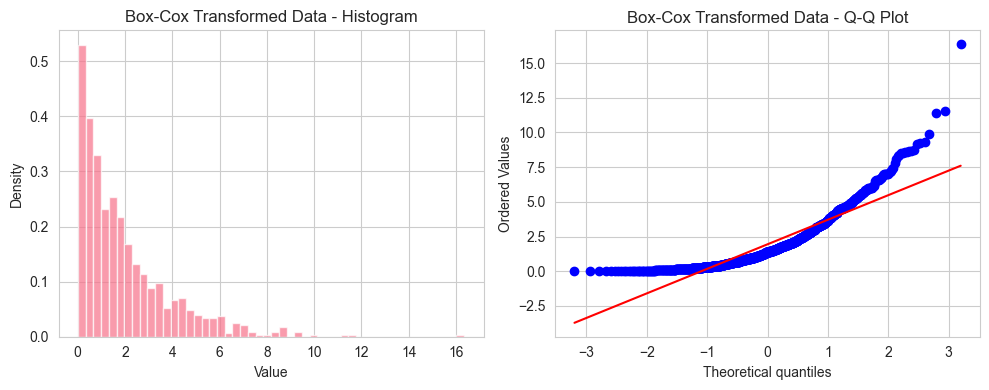

In [16]:
# Plot Box-Cox transformed data
plot_distribution(original_data, "Box-Cox Transformed Data")

Optimal lambda for Box-Cox transform: 0.2462


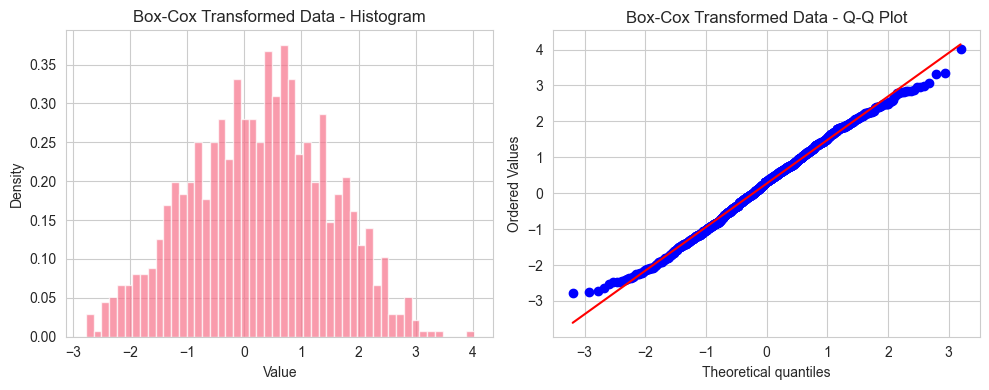

In [12]:
# Create PowerTransformer instance for Box-Cox
pt_boxcox = PowerTransformer(method='box-cox', standardize=False)

# Apply Box-Cox transformation
transformed_boxcox = pt_boxcox.fit_transform(original_data.reshape(-1, 1)).flatten()

# Plot Box-Cox transformed data
plot_distribution(transformed_boxcox, "Box-Cox Transformed Data")

# Print optimal lambda value for Box-Cox transform
print(f"Optimal lambda for Box-Cox transform: {pt_boxcox.lambdas_[0]:.4f}")

**Yeo-Johnson transformation** is similar to Box-Cox but can handle both positive and negative values.


Optimal lambda for Yeo-Johnson transform: -0.3726


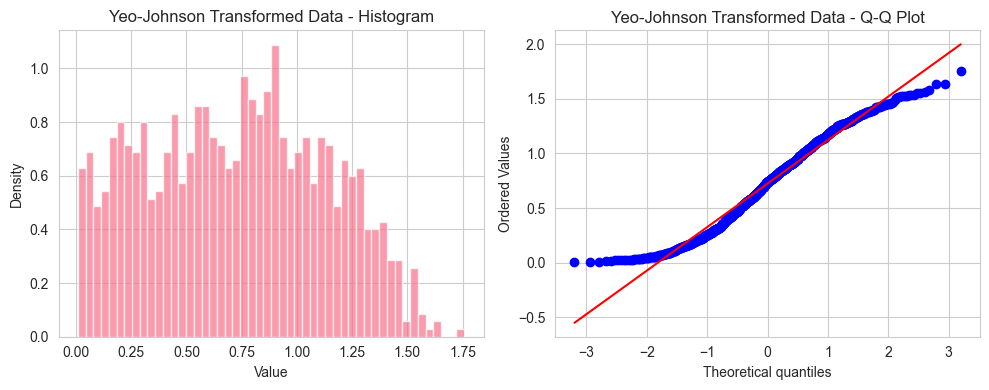

In [13]:
# Create PowerTransformer instance for Yeo-Johnson
pt_yeojohnson = PowerTransformer(method='yeo-johnson', standardize=False)

# Apply Yeo-Johnson transformation
transformed_yeojohnson = pt_yeojohnson.fit_transform(original_data.reshape(-1, 1)).flatten()

# Plot Yeo-Johnson transformed data
plot_distribution(transformed_yeojohnson, "Yeo-Johnson Transformed Data")

# Print optimal lambda value for Yeo-Johnson transform
print(f"Optimal lambda for Yeo-Johnson transform: {pt_yeojohnson.lambdas_[0]:.4f}")

### <a id='toc4_5_'></a>[When to Use These Methods](#toc0_)


- **Robust Scaling:** When your data has outliers that you don't want to remove.
- **Max Abs Scaling:** For sparse data or when you want to preserve zero values.
- **Quantile Transformation:** When you want to transform your features to a specific distribution, especially useful for algorithms that assume a certain distribution of the data.
- **Power Transformations:** When you want to make your data more Gaussian-like, which can be beneficial for many statistical methods and machine learning algorithms.


❗️ **Important Note:** Always consider the nature of your data and the requirements of your downstream analysis or machine learning algorithm when choosing a scaling method.


🤔 **Why This Matters:** Different scaling methods can significantly impact the performance of your models. Experimenting with various scaling techniques can often lead to improved model performance and more robust results.

By understanding and applying these additional scaling methods, you can handle a wider range of data characteristics and potentially improve the performance of your machine learning models in various scenarios.

## <a id='toc5_'></a>[When to Apply Feature Scaling](#toc0_)

Feature scaling is a crucial step in data preprocessing, but knowing when and how to apply it can significantly impact your model's performance. Let's explore the scenarios where feature scaling is beneficial, how to implement it effectively, and some best practices to follow.


Feature scaling is not always necessary, but it's particularly important in the following scenarios:

1. **Distance-Based Algorithms:**
   Algorithms that rely on calculating distances between data points, such as K-Nearest Neighbors (KNN), K-Means clustering, and Support Vector Machines (SVM), benefit greatly from feature scaling.

2. **Gradient Descent-Based Algorithms:**
   Methods that use gradient descent for optimization, including neural networks and logistic regression, converge faster with scaled features.

3. **Regularization:**
   When using regularization techniques (like L1 or L2), feature scaling ensures that all features are penalized equally.

4. **Principal Component Analysis (PCA):**
   PCA is sensitive to the scale of features, so scaling is crucial before applying this technique.

5. **Features with Different Scales:**
   When your dataset contains features with significantly different scales (e.g., age in years vs. income in dollars).


🔑 **Key Concept:** Not all algorithms require feature scaling. Tree-based methods like Random Forests and Decision Trees are generally invariant to feature scales.



Here are some best practices for applying feature scaling:

1. **Scale After Splitting:**
   Always split your data into training and test sets before applying feature scaling. This prevents data leakage from the test set into the training process.

   ```python
   # Correct approach
   X_train, X_test = train_test_split(X, test_size=0.2)
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ```

2. **Consistent Scaling:**
   Use the same scaler instance for both training and test data to ensure consistent scaling.

3. **Handle Outliers:**
   If your data contains significant outliers, consider using robust scaling methods or addressing the outliers before scaling.

4. **Feature-wise Scaling:**
   Most scaling methods operate on each feature independently. Be aware of this when dealing with features that might have meaningful relationships in their raw scales.

5. **Cross-Validation:**
   When using cross-validation, apply scaling within each fold to prevent data leakage.

   ```python
   from sklearn.model_selection import cross_val_score
   from sklearn.pipeline import make_pipeline

   pipeline = make_pipeline(StandardScaler(), SVC())
   scores = cross_val_score(pipeline, X, y, cv=5)
   ```

6. **Domain Knowledge:**
   Sometimes, domain-specific knowledge might suggest keeping certain features unscaled. Always consider the context of your data.


💡 **Pro Tip:** Experiment with different scaling methods. The choice between normalization, standardization, or other methods can impact model performance.


❗️ **Important Note:** While feature scaling is often beneficial, it's not a one-size-fits-all solution. Always validate its impact on your specific dataset and chosen algorithm.


Proper application of feature scaling can lead to faster convergence of training algorithms, improved model performance, and more interpretable feature importances. However, incorrect application can introduce bias or reduce model performance.


By following these guidelines and best practices, you can effectively apply feature scaling in your machine learning projects, leading to more robust and reliable models.

## <a id='toc6_'></a>[Summary](#toc0_)

Feature scaling is a crucial step in the data preprocessing pipeline for many machine learning algorithms. This summary encapsulates the key points we've covered about normalization, standardization, and other scaling techniques. Here's a quick recap:

1. **Normalization (Min-Max Scaling)**
   - Scales features to a fixed range, typically [0, 1]
   - Preserves zero values in sparse data
   - Sensitive to outliers

2. **Standardization (Z-score Normalization)**
   - Centers data around 0 with a standard deviation of 1
   - Less affected by outliers compared to normalization
   - Widely used in many machine learning algorithms

3. **Other Scaling Techniques**
   - Robust Scaling: Uses median and IQR, resistant to outliers
   - Max Abs Scaling: Scales by maximum absolute value, preserves sparsity
   - Quantile Transformation: Transforms features to uniform or normal distribution
   - Power Transformations (Box-Cox, Yeo-Johnson): Make data more Gaussian-like



Feature scaling is a powerful tool in the data scientist's toolkit. When applied correctly, it can significantly improve model performance, speed up training, and make certain algorithms work as intended. However, it's not a magic solution for all problems. Understanding when and how to apply scaling techniques is crucial for developing effective machine learning models.


By mastering feature scaling, you're taking an important step towards building more robust and efficient machine learning pipelines. Remember to always experiment, validate your approach, and consider the specific requirements of your data and chosen algorithms.